# Dataset Biomarcadores: Filtro reliefF y wrapper predicción DIAGNÓSTICO

## Índice

  
**1. Carga de los datos**  

**2. Preprocesado de los datos**

**3. Selección de variables**
   
**4. Aplicación de los modelos de Machine Learning** 

    4.1. Decision Tree
    4.2. Random Forest
    4.3. SVM
    4.4. KNN
    4.5. Logistic Regression
    4.6. XGBoost
    4.7. CatBoost

**5. Interpretabilidad de los modelos** 

In [1]:
# Importaciones
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, kruskal, f_oneway, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from skrebate import ReliefF
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
pd.set_option('display.max_columns', None)
%matplotlib inline

## 1. Cargar los datos

In [2]:
# Cargar el archivo CSV
archivo_csv = './Datos/GSE29676_processed.csv'
df = pd.read_csv(archivo_csv)
#pd.set_option('display.max_columns', None)

df.head()

/var/folders/0b/vqcfbgmd5p52qzyll4bsk5b80000gn/T/ipykernel_7279/2199550652.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv)


Sample_ID Sample_geo_accession  \
0  Alzheimer's Disease serum (PD vs. AD) sample 1            GSM734833   
1  Alzheimer's Disease serum (PD vs. AD) sample 2            GSM734834   
2  Alzheimer's Disease serum (PD vs. AD) sample 3            GSM734835   
3  Alzheimer's Disease serum (PD vs. AD) sample 4            GSM734836   
4  Alzheimer's Disease serum (PD vs. AD) sample 5            GSM734837   

  Sample_age Sample_gender  Sample_mmse     Sample_diagnosis            1  \
0        UNK        Female          5.0  Alzheimer's Disease  7289.964133   
1        UNK        Female          8.0  Alzheimer's Disease   938.445406   
2         94          Male          8.0  Alzheimer's Disease   341.021574   
3         83        Female         11.0  Alzheimer's Disease   895.008306   
4        UNK          Male         12.0  Alzheimer's Disease   789.470167   

             2           3            4            5            6           7  \
0  2388.467919  747.362250  4584.640077  4023.209190  1866.587224  481.421303   
1  6746.887199  426.744667   879.025263  1986.400664  2042.383278  461.119956   
2   221.883908  181.105244   742.411562  1023.864303   837.161987  257.865082   
3  1033.330868  349.894758  1635.340642  1127.703651  2225.766753  455.851204   
4   944.010349  172.624672   589.225547  1113.346932  1487.531459  272.253768   

            8            9          10           11           12  \
0  586.888482  1310.611536  595.525880  1171.503964  1382.892922   
1  634.469631  1739.880730  842.685671   695.854077   677.684281   
2  325.029941   803.179767  194.698132   417.381621   480.948362   
3  493.327760  1385.610498  556.015818   765.203142   693.316293   
4  321.903912   872.658818  819.391776   408.380653   546.809199   

             13           14           15           16           17        18  \
0  13897.573800  1860.222826   389.137522   641.895071  1007.393397 -1.363800   
1   1375.993735  2453.413527   360.940541  1550.325561   945.811540 -0.491076   
2    823.968890   993.879991   128.732646   171.510264   698.034780 -2.398745   
3   3099.992605  1953.891371  7647.261678   176.139815  1754.584231 -3.066264   
4   2265.822123  1802.530385   251.538808   244.962630   458.359605 -2.301662   

            19           20           21          22          23        24  \
0  1151.046968  5111.521371  1852.040027  730.087453  761.000247 -1.363800   
1   934.025726  5237.811985  1870.997906  380.092488  356.029785 -1.964302   
2   419.780366  5814.957548  1056.247359  229.080143  399.790825 -0.399791   
3   697.745341  6423.481764   967.917243  294.702012  343.080839 -4.769744   
4   612.242170  5296.124937   775.660193  206.491989  228.850994 -3.288089   

           25           26           27        28           29           30  \
0  622.347275  1177.868363  2582.582080  1.818400  1086.039181   931.929812   
1  356.029785   809.292532  2192.161326  1.473227  1376.484811   889.337850   
2  169.111519   604.483727   444.567397  0.799582   758.403195  2928.068002   
3  343.080839   445.971021  1197.205628 -1.362784  2768.154733   880.699075   
4  222.932434  1079.479616  5560.158483  0.657618  1083.425322   718.776253   

           31          32        33          34        35          36  \
0   -2.273000  685.082062 -3.636799  890.561221 -2.727599  935.112012   
1  158.126332  677.684281 -3.437529  515.629344 -1.964302  538.709896   
2   -0.799582  281.052950 -2.398745  392.594590 -2.798536  504.136230   
3   -2.725568  381.920179 -5.451135  451.081460 -7.495311  752.938087   
4   -1.315236  239.044070 -1.644044  273.240195 -0.657618  333.741033   

            37           38          39           40           41          42  \
0  2149.348367  2306.639936  791.003841  6942.195203   789.640041  523.699095   
1   165.001390   691.434397  928.623895   864.784071   758.711749  432.637573   
2  1076.236901   419.780366  852.753830   537.718659   385.798146  297.044583   
3  1743.000568  1272.840133  922.604679  1

## 2. Preprocesado de los datos

In [3]:
# Reemplazar "UNK" con NaN en la columna Sample_age
df["Sample_age"] = df["Sample_age"].replace("UNK", np.nan)

In [4]:
df.describe()

Sample_mmse             1             2             3             4  \
count     350.0000    609.000000    609.000000    609.000000    609.000000   
mean       16.5200   4583.267636   4050.527725   2457.130826   3166.712128   
std         5.3826   8472.466602   6299.759053   2572.270194   3021.656035   
min         2.0000     -0.696199     -0.637979    105.481529    265.895288   
25%        13.0000    848.243411   1141.490604    652.638911   1170.555131   
50%        18.0000   1830.302820   2251.975736   1699.546166   2161.575544   
75%        20.0000   3544.044081   4013.246606   3461.257725   4061.564016   
max        24.0000  37253.609210  33907.862840  21191.898240  23094.034830   

                  5             6              7             8             9  \
count    609.000000    609.000000     609.000000    609.000000    609.000000   
mean    5560.026350   6429.672828   19904.306058  13942.954158  16503.364960   
std     9742.164870   7921.520468   30388.575215  21813.798297  26664.186929   
min      -12.565150     -0.661485     118.161769    172.324449    310.140902   
25%      801.144360   1627.831651     730.393977    862.882243   1469.910965   
50%     1766.057696   2921.963517    3141.520455   2608.657034   2738.977413   
75%     4388.578171   8867.897180   15976.871890   9323.842786   7569.778548   
max    45315.140250  37359.604210  106556.841000  77380.348270  98248.649850   

                  10            11            12            13             14  \
count     609.000000    609.000000    609.000000    609.000000     609.000000   
mean    24450.079896  11957.476557   2949.095992   8383.486735   16699.729375   
std     30020.919388  21995.336675   2886.102685  15897.409709   26661.395917   
min        95.568094    268.807767    265.891227    289.950931     424.051932   
25%      1046.949738    987.874001   1037.922773   1624.952606    1936.059543   
50%      4271.631366   2360.649709   2001.685258   2737.196155    3125.547365   
75%     54466.290410   8036.208564   3888.803086   5558.164824    8587.946992   
max    100619.335400  94810.022690  21534.097390  76054.307390  112110.743800   

                 15             16            17             18            19  \
count    609.000000     609.000000    609.000000     609.000000    609.000000   
mean    9441.109216   11571.694626  18198.843636   15322.541294  17087.733828   
std    19428.637919   24088.534724  26848.456165   25318.449040  26380.994398   
min      -10.949271      67.521011     -2.725721      -7.389024    245.475447   
25%      524.452001     780.874453   1059.456999     195.382156   1203.842681   
50%     1905.644092    2129.274302   2772.582041    2555.756381   2874.624251   
75%     4375.577198    5728.626921  31008.607540    9307.492651  11165.575440   
max    82544.514810  105661.826500  97855.197320  102955.557400  94059.109530   

                 20            21            22            23            24  \
count    609.000000    609.000000    609.000000    609.000000    609.000000   
mean    4759.283806  16728.623850   9740.379774  10669.928684   2989.301784   
std     3269.795800  25203.788946  19734.392366  20759.415314   3496.851220   
min      347.091164    405.698513    -11.995128     67.246108     -7.389024   
25%     1988.596024   1605.991825    402.267829    761.000247    808.383330   
50%     3906.472971   3299.932200   1757.745295   2639.405447   2000.388696   
75%     7327.448452  14966.477410   6920.259630  10202.103500   3886.169089   
max    25349.849430  95016.042510  92975.143600  99804.073240  24867.268500   

                 25            26            27            28             29  \
count    609.000000    609.000000    609.000000    609.000000     609.000000   
mean   21983.016706  14171.002622   3623.023302   9619.661165   13113.835514   
std    29833.276277  21026.211080   5192.724797  19417.608875   25679.905995   
min       58.023246    110.841856    295.629644    -93.248791     276.823312   
25%      53

In [5]:
unique_values_count = df['Sample_ID'].nunique()
print(unique_values_count)

609


In [6]:
df.shape

(609, 9486)

In [7]:
# Calcular los porcentajes de cada categoría en la columna diagnosis
porcentajes = df['Sample_diagnosis'].value_counts(normalize=True) * 100

print("%")
print(porcentajes)
print("\n")
print(df['Sample_diagnosis'].value_counts())

%
Alzheimer's Disease    57.471264
Older Control          19.704433
Younger Control        13.136289
Breast Cancer           4.926108
Parkinson's Disease     4.761905
Name: Sample_diagnosis, dtype: float64


Alzheimer's Disease    350
Older Control          120
Younger Control         80
Breast Cancer           30
Parkinson's Disease     29
Name: Sample_diagnosis, dtype: int64


In [8]:
mapping_diagnosis = {"Older Control": 0, "Younger Control": 1, "Alzheimer's Disease": 2, "Breast Cancer": 3, "Parkinson's Disease": 4}  
df["Sample_diagnosis"] = df["Sample_diagnosis"].map(mapping_diagnosis)

In [9]:
mapping_gender = {"Male": 0, "Female": 1}  
df["Sample_gender"] = df["Sample_gender"].map(mapping_gender)

In [10]:
df['Sample_age'] = pd.to_numeric(df['Sample_age'], errors='coerce').astype('Int64')
df['Sample_gender'] = df['Sample_gender'].astype('Int64')

In [91]:
def mean_std(series):
    return f"{series.mean():.1f} ± {series.std():.1f}"
  
# Función para calcular porcentaje para variables categóricas
def category_percentage(series):
    counts = series.value_counts(normalize=True) * 100
    # Redondear y convertir todos los porcentajes a string
    percentages = [f"{p:.0f}" for p in counts]
    num_unique_classes = series.nunique(dropna=True)
    if len(percentages) < num_unique_classes:
        percentages += ["0"] * (num_unique_classes - len(percentages))
    # Unir los porcentajes con "/"
    return "/".join(percentages)


numeric_vars = ['Sample_age', 'Sample_mmse']
categoricas = ['Sample_gender', 'Sample_diagnosis']

# Inicializar lista para guardar resultados
results = []

# Para cada variable
for var in numeric_vars + categoricas:
    if var in numeric_vars:
        total = mean_std(df[var])
        mayor = mean_std(df[df['Sample_diagnosis'] == 0][var])
        joven = mean_std(df[df['Sample_diagnosis'] == 1][var])
        alzheimer = mean_std(df[df['Sample_diagnosis'] == 2][var])
        cancer = mean_std(df[df['Sample_diagnosis'] == 3][var])
        parkinson = mean_std(df[df['Sample_diagnosis'] == 4][var])
    elif var in categoricas:  # Categóricas
        total = category_percentage(df[var])
        mayor = category_percentage(df[df['Sample_diagnosis'] == 0][var])
        joven = category_percentage(df[df['Sample_diagnosis'] == 1][var])
        alzheimer = category_percentage(df[df['Sample_diagnosis'] == 2][var])
        cancer = category_percentage(df[df['Sample_diagnosis'] == 3][var])
        parkinson = category_percentage(df[df['Sample_diagnosis'] == 4][var])
    
    results.append({
        'Variable': var,
        'Total': total,
        'mayor': mayor,
        'joven': joven,
        'Alzheimer': alzheimer,
        'cancer': cancer,
        'parkinson': parkinson
    })

tabla_resumen = pd.DataFrame(results)

tabla_resumen

           Variable         Total       mayor       joven   Alzheimer  \
0        Sample_age   64.9 ± 20.5  57.8 ± 7.6  24.6 ± 3.7  78.5 ± 8.7   
1       Sample_mmse    16.5 ± 5.4   nan ± nan   nan ± nan  16.5 ± 5.4   
2     Sample_gender         56/44         100       70/30       58/42   
3  Sample_diagnosis  57/20/13/5/5         100         100         100   

       cancer   parkinson  
0  46.9 ± 5.8  74.3 ± 9.0  
1   nan ± nan   nan ± nan  
2         100       58/42  
3         100         100  


In [95]:
variable = 'Sample_age'

grupos = ['Controles mayores', 'Controles jóvenes', 'Alzheimer', 'Parkinson', 'Cáncer de mama']

# Agrupar datos
datos_por_grupo = [df[df['Sample_diagnosis'] == grupo][variable].dropna() for grupo in range(0, 5)]

# Test de normalidad (Shapiro-Wilk)
normalidad = [shapiro(datos)[1] > 0.05 for datos in datos_por_grupo]

if all(normalidad):
    # Si todas son normales, aplicar ANOVA
    stat, p_value = f_oneway(*datos_por_grupo)
    print(f"ANOVA: p-valor = {p_value:.4f}")
else:
    # Si alguna no es normal, aplicar Kruskal-Wallis
    stat, p_value = kruskal(*datos_por_grupo)
    print(f"Kruskal-Wallis: p-valor = {p_value}")


Kruskal-Wallis: p-valor = 2.6321899677949363e-49


In [99]:
# Tabla de contingencia
contingencia = pd.crosstab(df['Sample_diagnosis'], df['Sample_gender'])

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingencia)

print(f"Chi-cuadrado: p-valor = {p_value}")

Chi-cuadrado: p-valor = 5.863064982266087e-35


## 3. Selección de variables

In [12]:
# Separar variables (X) y etiquetas (y)
X = df.drop(columns=['Sample_diagnosis', 'Sample_ID', 'Sample_geo_accession', 'Sample_age', 'Sample_gender', 'Sample_mmse'])  # o el nombre de la columna de salida
y = df['Sample_diagnosis']

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [13]:
print(X.shape)
print(X_scaled.shape)

(609, 9480)
(609, 9480)


### Eliminar las variables con varianza próxima a cero

In [14]:
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_scaled)

# Mantener los nombres de las columnas
selected_columns_var = X_scaled.columns[selector.get_support()]
X_var_df = pd.DataFrame(X_var, columns=selected_columns_var)

In [15]:
X_var_df.shape

(609, 9480)

### Eliminar las variables con alta correlación

In [16]:
# Correlación de Spearman
corr_matrix = X_var_df.corr(method='spearman').abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Eliminar una variable de cada par con correlación > 0.80
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
X_uncorrelated = X_var_df.drop(columns=to_drop)

In [17]:
X_uncorrelated.shape

(609, 7976)

### Aplicar reliefF

In [21]:
relief = ReliefF(n_neighbors=10)
relief.fit(X_uncorrelated.values, y.values)

# Ordenar por importancia
relief_scores = pd.Series(relief.feature_importances_, index=X_uncorrelated.columns)
top_relief_features = relief_scores.sort_values(ascending=False)

In [22]:
# Seleccionar las 500 más importantes
X_relief_selected = X_uncorrelated[top_relief_features.head(500).index]

In [23]:
X_relief_selected.shape

(609, 500)

In [24]:
X_relief_selected.columns

Index(['3547', '4697', '5379', '5306', '6954', '3946', '3922', '1902', '779',
       '3368',
       ...
       '5528', '7764', '3835', '6359', '3561', '8194', '602', '8397', '7197',
       '7181'],
      dtype='object', length=500)

### Determinación del nº óptimo de variables y selección

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_relief_selected, y)

X_final = X_relief_selected.loc[:, rfecv.support_]

print(f"Número óptimo de variables: {X_final.shape[1]}")
print("Variables seleccionadas:", X_final.columns)

Número óptimo de variables: 23
Variables seleccionadas: Index(['5306', '7', '4079', '4331', '136', '1', '9442', '6332', '6812', '20',
       '40', '8714', '15', '6342', '2', '13', '114', '3886', '7506', '61',
       '363', '9445', '9329'],
      dtype='object')


In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100)
}

for name, model in models.items():
    scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f}")

Logistic Regression Accuracy: 0.5481
Random Forest Accuracy: 0.7289
XGBoost Accuracy: 0.7585


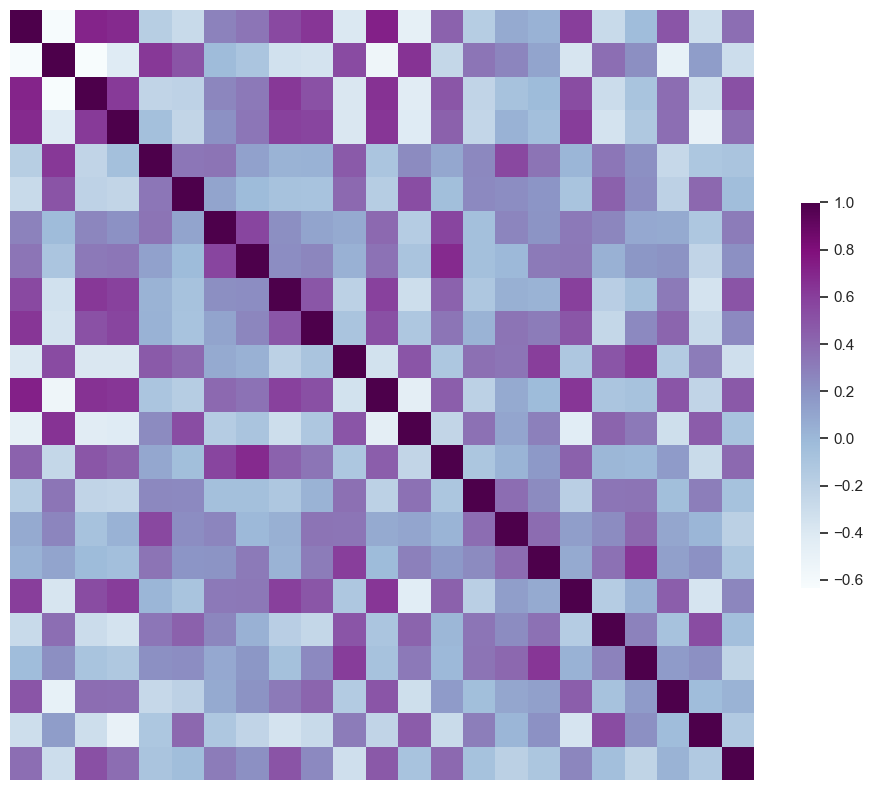

In [110]:
# Crear la máscara para la mitad inferior
#mask = np.tril(np.ones_like(corr, dtype=bool))

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    X_final.corr(method='spearman'),
    cmap='BuPu',
    #mask=mask,
    #vmin=-1, vmax=1,
    cbar_kws={"shrink": .5},
    xticklabels=False,
    yticklabels=False
)

# Guardar como PNG
plt.savefig("./Figuras/correlaciones_wrapper.png", dpi=500, bbox_inches='tight')
plt.show()

## 4. Aplicación de los modelos de Machine Learning

In [27]:
# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, random_state=42)

print("Distribución antes de SMOTE:", Counter(y_train))

Distribución antes de SMOTE: Counter({2: 262, 0: 90, 1: 60, 3: 22, 4: 22})


In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Después del oversampling
print("Distribución después de SMOTE:", Counter(y_resampled))

Distribución después de SMOTE: Counter({2: 262, 0: 262, 1: 262, 3: 262, 4: 262})


In [29]:
# Inicializar dataframe de resultados
wrapper_results_df = pd.DataFrame(columns=["ID", "Modelo", "Precisión global", "Precision AD", "Recall AD", "AUC ROC AD"])

### 4.1. Decision Tree

In [30]:
dt_model = DecisionTreeClassifier()

parameters = {'max_depth': [3, 4, 5, 6, 7, 12, None]}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
dt_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = dt_best_model.predict(X_test)
y_pred_binary = (y_pred == 2).astype(int)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)


print(f'Decision Trees:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Decision Trees:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.40      0.50      0.44        20
           2       0.85      0.81      0.83        88
           3       1.00      1.00      1.00         8
           4       0.60      0.43      0.50         7

    accuracy                           0.74       153
   macro avg       0.70      0.69      0.69       153
weighted avg       0.75      0.74      0.74       153

Best Parameters: {'max_depth': 12}



In [31]:
cvscores = cross_val_score(dt_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

69.98 +/- 4.47 %


<Axes: >

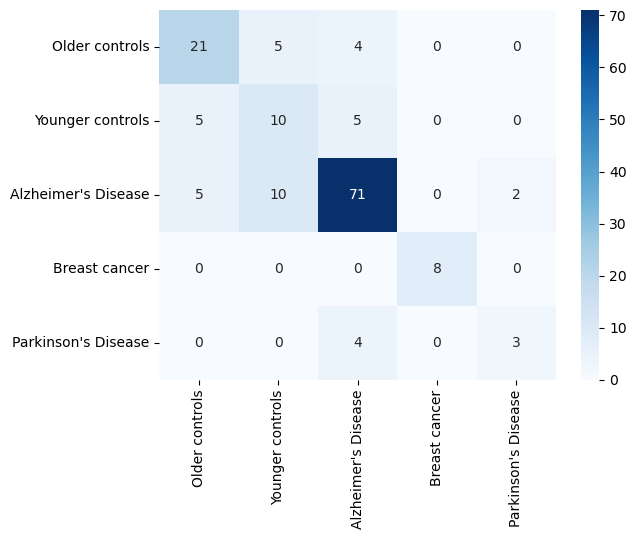

In [32]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

In [33]:
# Binarización de las clases
classes = [0, 1, 2, 3, 4]
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)
n_classes = y_test_bin.shape[1]


def plot_roc_curve(y_test, y_pred, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    # Gráfica
    plt.figure(figsize=(10, 8))
    colors = cycle(['gray', 'brown', 'red', 'pink', 'blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

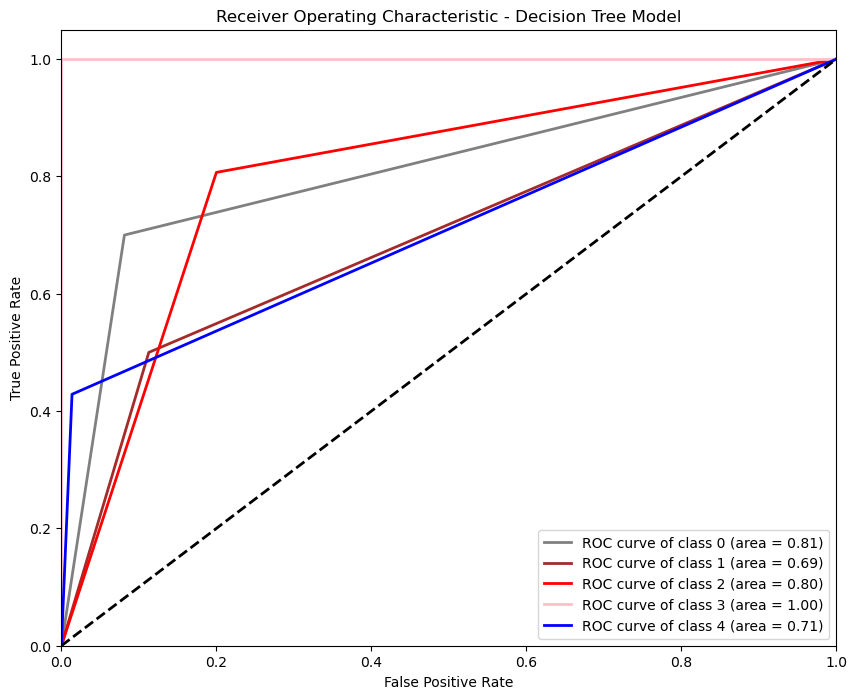

In [34]:
y_pred_seq_prob = dt_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "Decision Tree Model")

In [35]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 1,
        "Modelo": "Decision Tree",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [36]:
wrapper_results_df

ID         Modelo  Precisión global  Precision AD  Recall AD  AUC ROC AD
0  1  Decision Tree            73.856        84.524     80.682      80.341

### 4.2. Random Forest

In [37]:
rf_model = RandomForestClassifier()

parameters = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
rf_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = rf_best_model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)

print(f'Random Forest:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        30
           1       0.62      0.50      0.56        20
           2       0.94      0.94      0.94        88
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           0.86       153
   macro avg       0.85      0.85      0.85       153
weighted avg       0.86      0.86      0.86       153

Best Parameters: {'max_depth': None, 'n_estimators': 100}



In [38]:
cvscores = cross_val_score(rf_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

84.99 +/- 3.24 %


<Axes: >

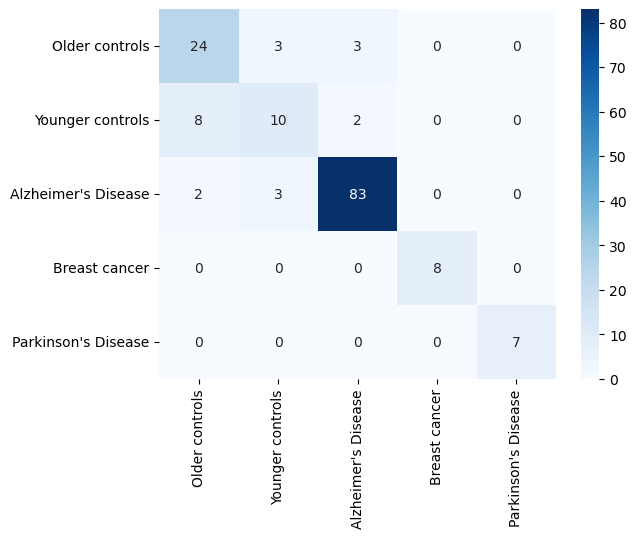

In [39]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

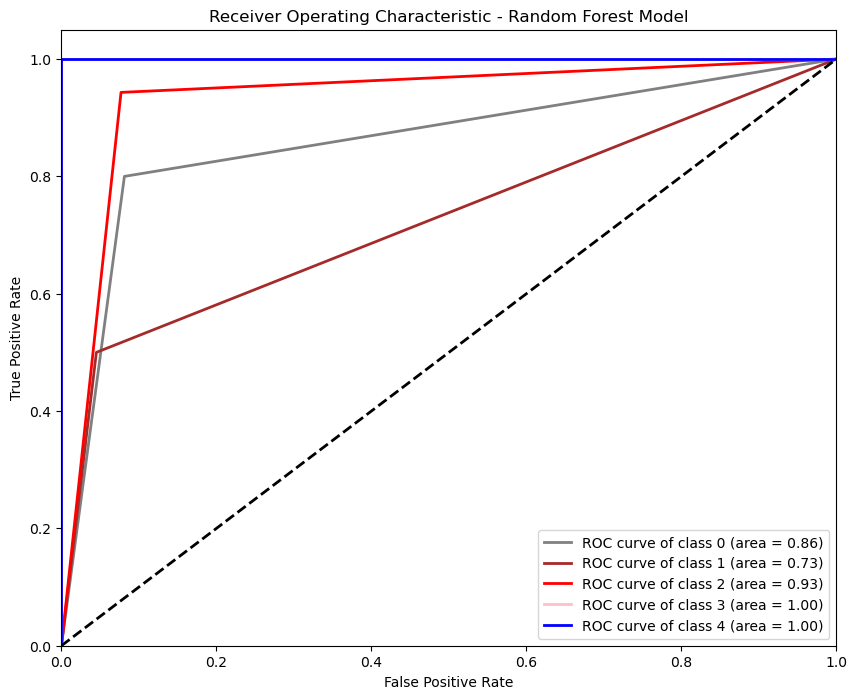

In [40]:
y_pred_bin = label_binarize(y_pred, classes=classes)

y_pred_seq_prob = rf_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "Random Forest Model")

In [41]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 2,
        "Modelo": "Random Forest",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [42]:
wrapper_results_df

ID         Modelo  Precisión global  Precision AD  Recall AD  AUC ROC AD
0  1  Decision Tree            73.856        84.524     80.682      80.341
1  2  Random Forest            86.275        94.318     94.318      93.313

### 4.3. SVM

In [43]:
svm_model = SVC()

parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
svm_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = svm_best_model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)

print(f'SVM:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

SVM:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        30
           1       0.50      0.70      0.58        20
           2       0.91      0.84      0.88        88
           3       1.00      1.00      1.00         8
           4       1.00      0.43      0.60         7

    accuracy                           0.78       153
   macro avg       0.81      0.73      0.75       153
weighted avg       0.81      0.78      0.79       153

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'}



In [44]:
cvscores = cross_val_score(svm_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

67.25 +/- 6.21 %


<Axes: >

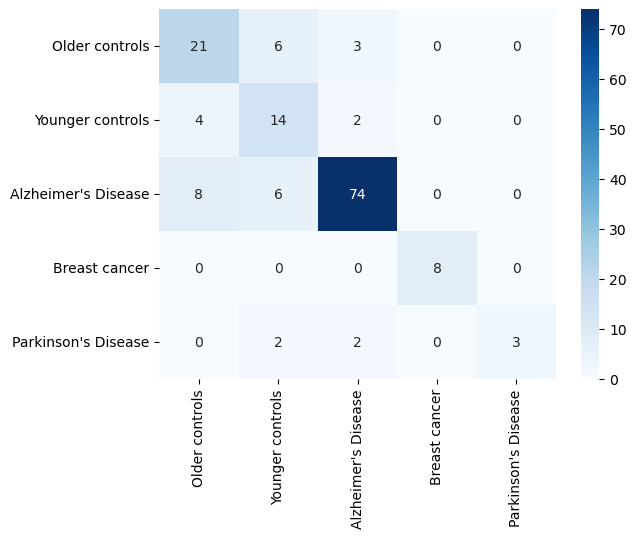

In [45]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

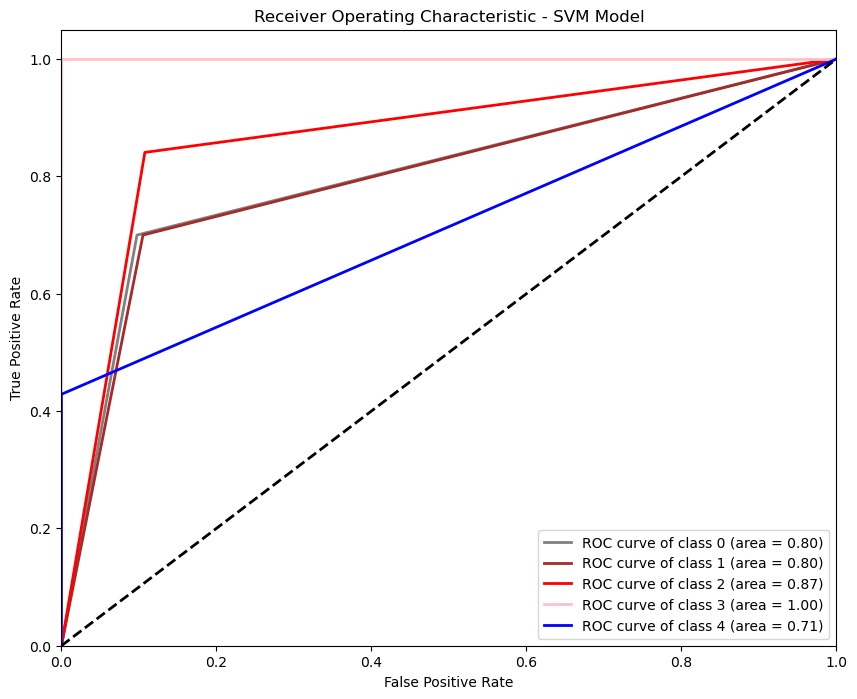

In [46]:
y_pred_bin = label_binarize(y_pred, classes=classes)

y_pred_seq_prob = svm_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "SVM Model")

In [47]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 3,
        "Modelo": "SVM",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [48]:
wrapper_results_df

ID         Modelo  Precisión global  Precision AD  Recall AD  AUC ROC AD
0  1  Decision Tree            73.856        84.524     80.682      80.341
1  2  Random Forest            86.275        94.318     94.318      93.313
2  3            SVM            78.431        91.358     84.091      86.661

### 4.4. K-Nearest Neighbors

In [49]:
knn_model = KNeighborsClassifier()

parameters = {'n_neighbors': [3, 5, 6, 7, 8, 9, 10]}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
knn_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = knn_best_model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)

print(f'KNN:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

KNN:
              precision    recall  f1-score   support

           0       0.60      0.70      0.65        30
           1       0.45      0.70      0.55        20
           2       0.97      0.75      0.85        88
           3       1.00      0.88      0.93         8
           4       0.58      1.00      0.74         7

    accuracy                           0.75       153
   macro avg       0.72      0.81      0.74       153
weighted avg       0.81      0.75      0.77       153

Best Parameters: {'n_neighbors': 3}



In [50]:
cvscores = cross_val_score(knn_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

71.16 +/- 6.01 %


<Axes: >

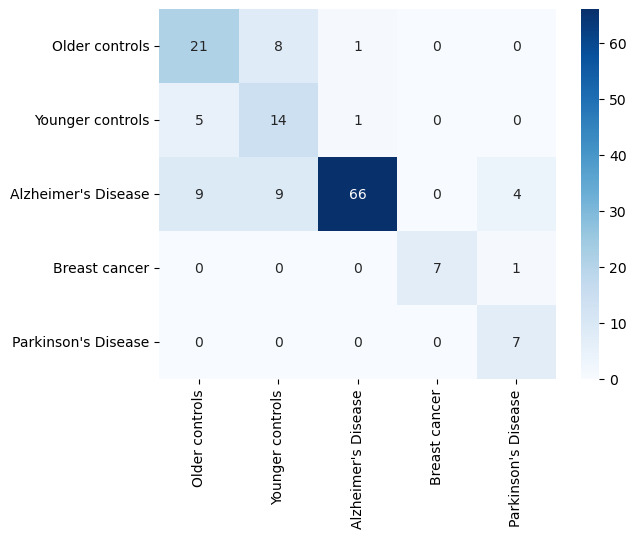

In [51]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

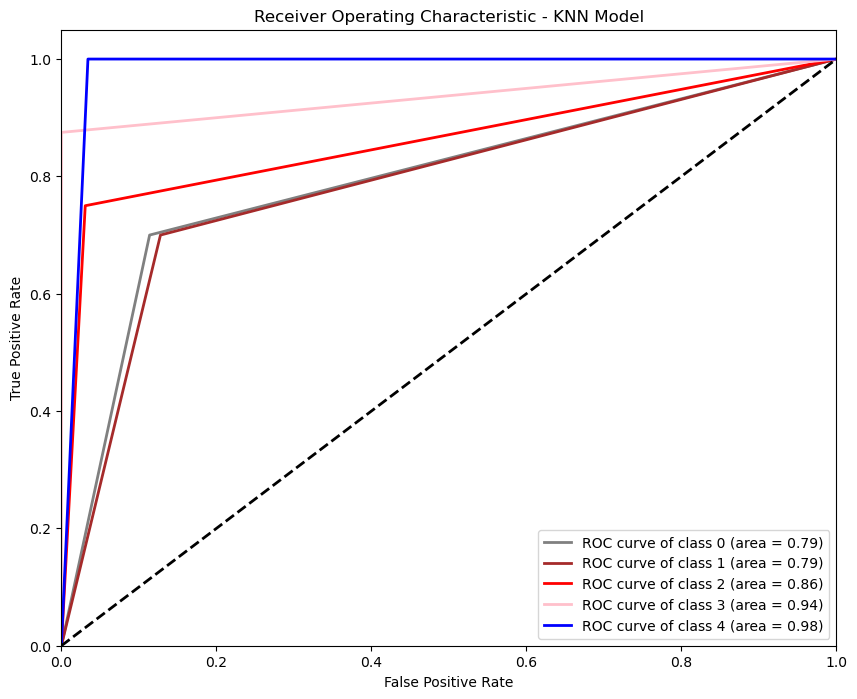

In [52]:
y_pred_bin = label_binarize(y_pred, classes=classes)

y_pred_seq_prob = knn_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "KNN Model")

In [53]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 4,
        "Modelo": "KNN Model",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [54]:
wrapper_results_df

ID         Modelo  Precisión global  Precision AD  Recall AD  AUC ROC AD
0  1  Decision Tree            73.856        84.524     80.682      80.341
1  2  Random Forest            86.275        94.318     94.318      93.313
2  3            SVM            78.431        91.358     84.091      86.661
3  4      KNN Model            75.163        97.059     75.000      85.962

### 4.5. Logistic Regression

In [55]:
lr_model = LogisticRegression()

parameters = {'C': [0.1, 1, 10], 'max_iter': [500, 1000, 1500]}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(lr_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
lr_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = lr_best_model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)

print(f'Logistic Regression:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

/Users/mariam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        30
           1       0.52      0.80      0.63        20
           2       0.89      0.72      0.79        88
           3       1.00      1.00      1.00         8
           4       0.71      0.71      0.71         7

    accuracy                           0.72       153
   macro avg       0.72      0.77      0.74       153
weighted avg       0.76      0.72      0.73       153

Best Parameters: {'C': 10, 'max_iter': 500}



/Users/mariam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
cvscores = cross_val_score(lr_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

69.23 +/- 3.80 %


<Axes: >

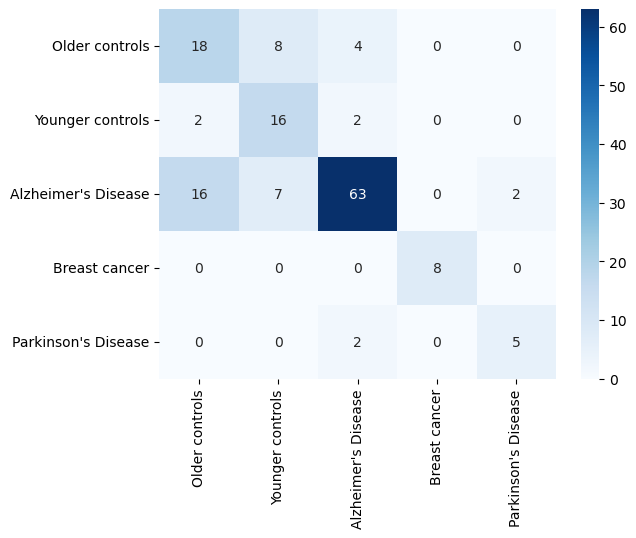

In [57]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

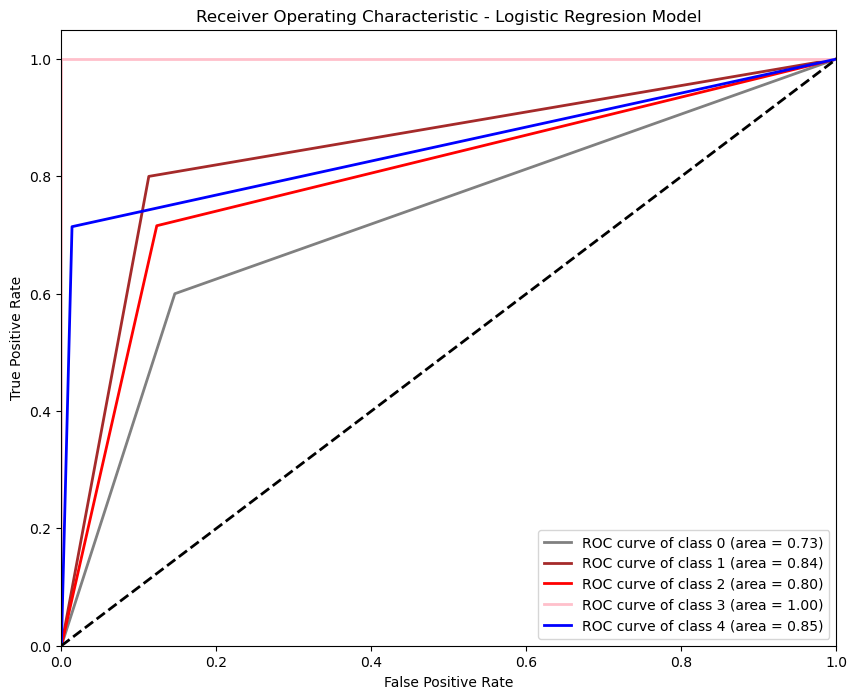

In [58]:
y_pred_bin = label_binarize(y_pred, classes=classes)

y_pred_seq_prob = lr_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "Logistic Regresion Model")

In [59]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 5,
        "Modelo": "Logistic Regression",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [60]:
wrapper_results_df

ID              Modelo  Precisión global  Precision AD  Recall AD  \
0  1       Decision Tree            73.856        84.524     80.682   
1  2       Random Forest            86.275        94.318     94.318   
2  3                 SVM            78.431        91.358     84.091   
3  4           KNN Model            75.163        97.059     75.000   
4  5  Logistic Regresion            71.895        88.732     71.591   

   AUC ROC AD  
0      80.341  
1      93.313  
2      86.661  
3      85.962  
4      79.642

### 4.6. XGBoost

In [61]:
xgb_model = XGBClassifier()

parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
xgb_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = xgb_best_model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)

print(f'XGBoost:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.71      0.85      0.77        20
           2       0.97      0.95      0.96        88
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           0.92       153
   macro avg       0.91      0.92      0.91       153
weighted avg       0.92      0.92      0.92       153

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}



In [62]:
cvscores = cross_val_score(xgb_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

82.97 +/- 3.42 %


<Axes: >

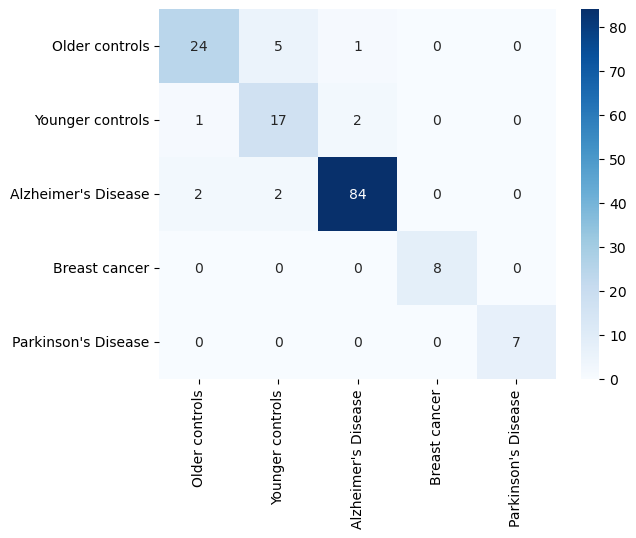

In [63]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

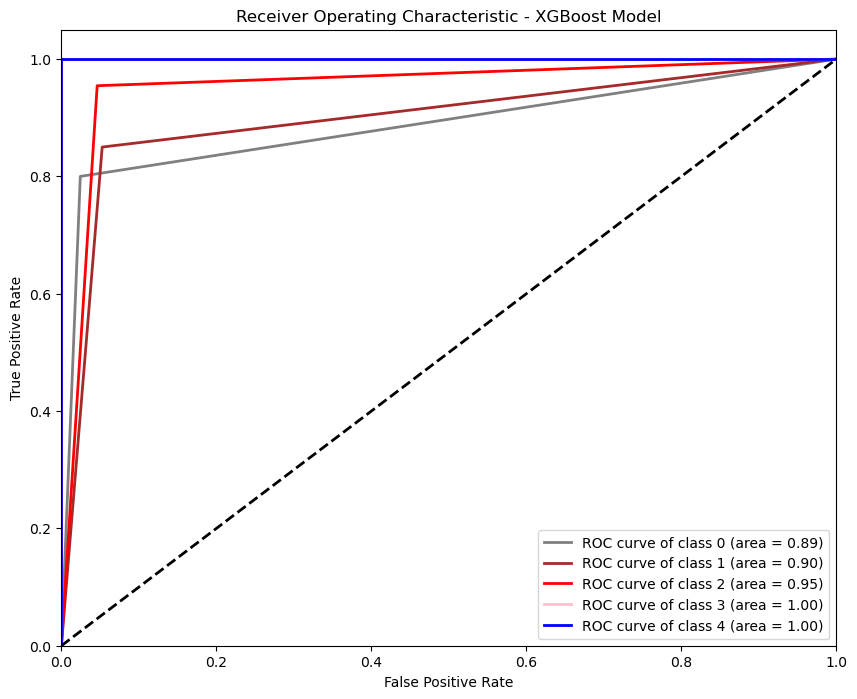

In [64]:
y_pred_bin = label_binarize(y_pred, classes=classes)

y_pred_seq_prob = xgb_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "XGBoost Model")

In [65]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 6,
        "Modelo": "XGBoost",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [66]:
wrapper_results_df

ID              Modelo  Precisión global  Precision AD  Recall AD  \
0  1       Decision Tree            73.856        84.524     80.682   
1  2       Random Forest            86.275        94.318     94.318   
2  3                 SVM            78.431        91.358     84.091   
3  4           KNN Model            75.163        97.059     75.000   
4  5  Logistic Regresion            71.895        88.732     71.591   
5  6             XGBoost            91.503        96.552     95.455   

   AUC ROC AD  
0      80.341  
1      93.313  
2      86.661  
3      85.962  
4      79.642  
5      95.420

### 4.7. CatBoost

In [67]:
cat_model = CatBoostClassifier(verbose=0)

parameters = {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}

# Ajuste con GridSearchCV
grid_search = GridSearchCV(cat_model, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
    
# Guardar el mejor modelo
cat_best_model = grid_search.best_estimator_
    
# Evaluar el modelo
y_pred = cat_best_model.predict(X_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report = classification_report(y_test, y_pred)

print(f'CatBoost:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

CatBoost:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.59      0.80      0.68        20
           2       0.93      0.91      0.92        88
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           0.86       153
   macro avg       0.87      0.88      0.87       153
weighted avg       0.88      0.86      0.87       153

Best Parameters: {'iterations': 200, 'learning_rate': 1}



In [68]:
cvscores = cross_val_score(cat_best_model, X_test, y_test, cv=5)
print("{:.2f} +/- {:.2f} %".format(np.mean(cvscores)*100, np.std(cvscores)*100))

78.45 +/- 3.75 %


<Axes: >

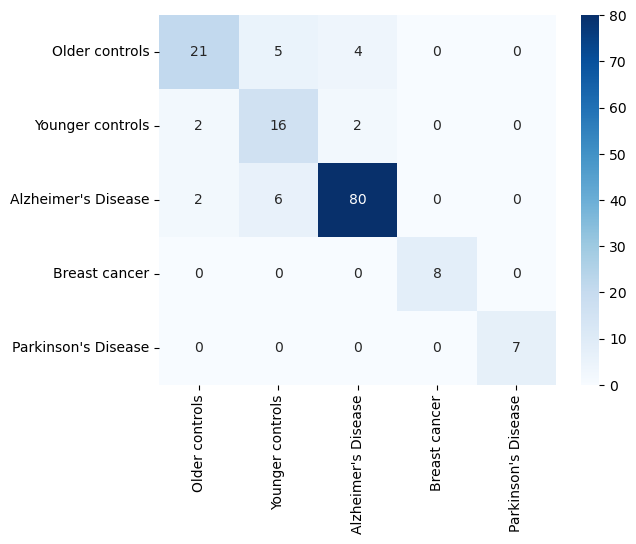

In [69]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Older controls", "Younger controls", "Alzheimer's Disease", "Breast cancer", "Parkinson's Disease"]  # Asume que las clases son enteros consecutivos
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

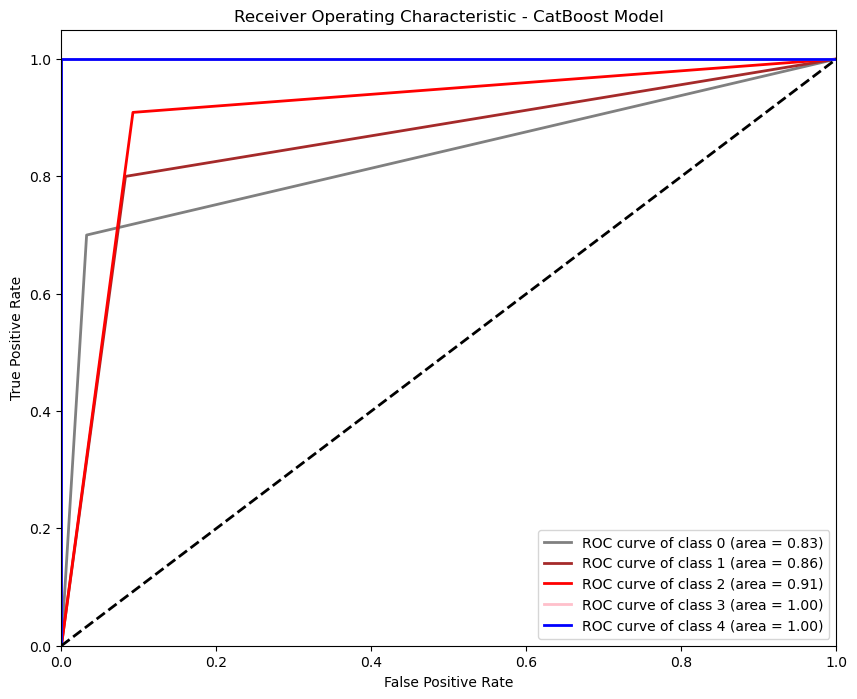

In [70]:
y_pred_bin = label_binarize(y_pred, classes=classes)

y_pred_seq_prob = cat_best_model.predict(X_test)
roc_auc = plot_roc_curve(y_test_bin, y_pred_seq_prob, "CatBoost Model")

In [71]:
# Añadir fila al DataFrame
wrapper_results_df = pd.concat([wrapper_results_df, pd.DataFrame({
        "ID": 7,
        "Modelo": "CatBoost",
        "Precisión global": [round(report_dict['accuracy']*100, 3)],
        "Precision AD": [round(report_dict['2']['precision']*100, 3)],
        "Recall AD": [round(report_dict['2']['recall']*100, 3)],
        "AUC ROC AD": [round(roc_auc[2]*100, 3)]
    })], ignore_index=True)

In [72]:
wrapper_results_df

ID              Modelo  Precisión global  Precision AD  Recall AD  \
0  1       Decision Tree            73.856        84.524     80.682   
1  2       Random Forest            86.275        94.318     94.318   
2  3                 SVM            78.431        91.358     84.091   
3  4           KNN Model            75.163        97.059     75.000   
4  5  Logistic Regresion            71.895        88.732     71.591   
5  6             XGBoost            91.503        96.552     95.455   
6  7            CatBoost            86.275        93.023     90.909   

   AUC ROC AD  
0      80.341  
1      93.313  
2      86.661  
3      85.962  
4      79.642  
5      95.420  
6      90.839

In [73]:
# Guardar los resultados
wrapper_results_df.to_csv("wrapper_results.csv", index=False)

## 5. Interpretabilidad del modelo

In [74]:
# Cargar el archivo CSV con los id de las proteinas
archivo_csv = 'protein_id_df.csv'
protein_df = pd.read_csv(archivo_csv)

protein_df

ID     Database_ID Ulitmate ORF ID Swissprot ID Gene Symbol  \
0        1     NM_024548.2        IOH27601       Q8IW35      LRRIQ2   
1        2      BC011414.1         IOH9720       Q9NRY5      C5orf3   
2        3      BC004932.1         IOH5521       Q9BSN7    C16orf30   
3        4      BC037854.1        IOH27633       O14576     DYNC1I1   
4        5      BC051687.1        IOH26538       P57682        KLF3   
...    ...             ...             ...          ...         ...   
9091  9476     NM_002939.3        IOH25734       P13489        RNH1   
9092  9477     NM_153500.1        IOH37934       A8K7Q7      CAMKK2   
9093  9478  NM_001017973.1        IOH26049       O15460       P4HA2   
9094  9479  NM_001014291.1        IOH57344       Q9BYE4      SPRR2G   
9095  9480     NM_199359.1        IOH41594       Q68E05     TPD52L2   

                                         Protein Header  
0     leucine-rich repeats and IQ motif containing 2...  
1            chromosome 5 open reading frame 3 (C5orf3)  
2        chromosome 16 open reading frame 30 (C16orf30)  
3     dynein, cytoplasmic 1, intermediate chain 1 (D...  
4                  Kruppel-like factor 3 (basic) (KLF3)  
...                                                 ...  
9091                             Ribonuclease inhibitor  
9092  calcium/calmodulin-dependent protein kinase ki...  
9093               Prolyl 4-hydroxylase subunit alpha-2  
9094                      Small proline-rich protein 2G  
9095  tumor protein D52-like 2 (TPD52L2), transcript...  

[9096 rows x 6 columns]

### Random Forest

In [75]:
# Mostrar la importancia de las variables
importance = rf_best_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
rf_importance_df['Feature'] = rf_importance_df['Feature'].astype('int64')

rf_importance_df

Feature  Importance
6      9442    0.079793
11     8714    0.074982
3      4331    0.072464
18     7506    0.065764
2      4079    0.063039
9        20    0.061837
7      6332    0.061288
13     6342    0.059829
17     3886    0.044449
20      363    0.043351
14        2    0.041183
0      5306    0.040857
22     9329    0.038489
1         7    0.034288
8      6812    0.029211
16      114    0.028109
15       13    0.026048
19       61    0.025927
12       15    0.024661
10       40    0.024052
5         1    0.023354
21     9445    0.019711
4       136    0.017313

In [76]:
# Unir la información basada en la columna 'Feature' y 'ID_number'
rf_importance_merged = rf_importance_df.merge(protein_df, left_on='Feature', right_on='ID', how='left')

rf_importance_merged = rf_importance_merged.drop_duplicates(subset='Gene Symbol', keep='first')

rf_importance_merged.head(25)

Feature  Importance      ID  Database_ID Ulitmate ORF ID Swissprot ID  \
0      9442    0.079793  9442.0   BC029811.1        IOH22776       Q8N6L0   
1      8714    0.074982  8714.0   BC015628.1        IOH13638       P80404   
2      4331    0.072464  4331.0   BC029444.1        IOH23178       P01834   
3      7506    0.065764  7506.0  NM_004367.3        IOH26031       P51684   
4      4079    0.063039  4079.0  NM_006790.1         IOH7249       Q9UBF9   
5        20    0.061837    20.0   BC005332.1         IOH7177       P01834   
6      6332    0.061288  6332.0   BC000896.1         IOH3226       P61026   
7      6342    0.059829  6342.0  NM_032349.1         IOH6316       Q9BRJ7   
8      3886    0.044449     NaN          NaN             NaN          NaN   
9       363    0.043351   363.0   BC099907.1        IOH62625       P78347   
10        2    0.041183     2.0   BC011414.1         IOH9720       Q9NRY5   
12     9329    0.038489  9329.0  NM_030971.3        IOH40819       Q9BWM7   
13        7    0.034288     7.0  NM_000880.2        IOH26652       P13232   
14     6812    0.029211  6812.0   BC019015.2        IOH12089       Q9NX70   
15      114    0.028109   114.0  NM_032359.1         IOH5762       Q9BQ75   
16       13    0.026048    13.0  NM_017614.3        IOH12877       Q9H2M3   
17       61    0.025927    61.0  NM_205853.1        IOH43061       Q8IVN3   
18       15    0.024661    15.0  NM_016057.1         IOH5427       P61923   
19       40    0.024052    40.0   BC068448.1        IOH40093       Q8N987   
20        1    0.023354     1.0  NM_024548.2        IOH27601       Q8IW35   
21     9445    0.019711  9445.0  NM_020415.2        IOH40390       Q9HD89   
22      136    0.017313   136.0  NM_005801.2         IOH6916       P41567   

   Gene Symbol                                     Protein Header  
0     FLJ32658           hypothetical protein FLJ32658 (FLJ32658)  
1         ABAT            4-aminobutyrate aminotransferase (ABAT)  
2         IGKC               immunoglobulin kappa constant (IGKC)  
3         CCR6                      C-C chemokine receptor type 6  
4         MYOT                                    myotilin (MYOT)  
5       ENTPD1   cDNA clone MGC:12418 IMAGE:3934658, complete cds  
6        RAB10          RAB10, member RAS oncogene family (RAB10)  
7     NUDT16L1  nudix (nucleoside diphosphate linked moiety X)...  
8          NaN                                                NaN  
9        GTF2I                  General transcription factor II-I  
10      C5orf3         chromosome 5 open reading frame 3 (C5orf3)  
12       SFXN3                             sideroflexin 3 (SFXN3)  
13         IL7                                interleukin 7 (IL7)  
14         IXL                mediator complex subunit 29 (MED29)  
15     C3orf26       chromosome 3 open reading frame 26 (C3orf26)  
16       BHMT2   betaine-homocysteine methyltransferase 2 (BHMT2)  
17      MUSTN1  musculoskeletal, embryonic nuclear protein 1 (...  
18       COPZ1   coatomer protein complex, subunit zeta 1 (COPZ1)  
19      EFCBP1         EF-hand calcium binding protein 1 (EFCBP1)  
20      LRRIQ2  leucine-rich repeats and IQ motif containing 2...  
21        RETN                                    resistin (RETN)  
22        EIF1  eukaryotic translation initiation factor 1 (EIF1)

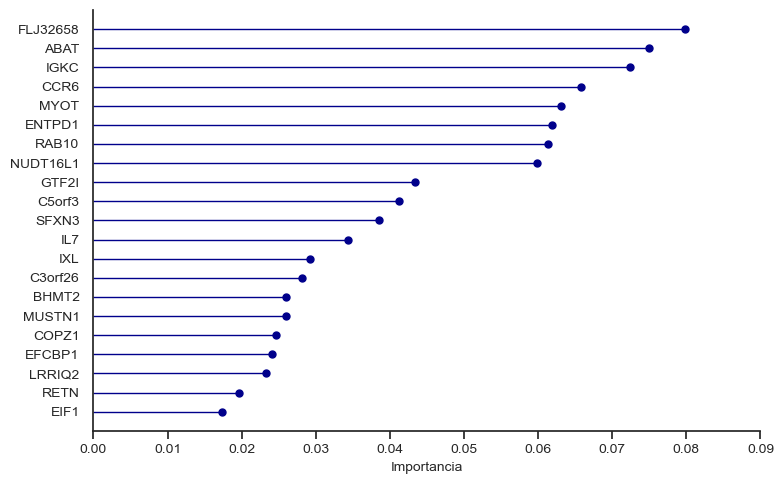

In [102]:
# Ordenar las variables por importancia
df_plot = rf_importance_merged.sort_values(by='Importance', ascending=False).head(25)
df_plot = df_plot.dropna(subset=['Gene Symbol'])  # por si acaso
df_plot['Gene Symbol'] = df_plot['Gene Symbol'].astype(str)
df_plot = df_plot.iloc[::-1]


# Gráfica
plt.figure(figsize=(8, 5))
sns.set_style("ticks")
plt.tick_params(axis='y', length=0)

plt.hlines(
    y=df_plot['Gene Symbol'],
    xmin=0,
    xmax=df_plot['Importance'],
    color='darkblue',
    linewidth=1)

plt.plot(
    df_plot['Importance'],
    df_plot['Gene Symbol'],
    'o',
    markersize=5,
    color='darkblue')

plt.xlabel('Importancia', fontsize=10)
plt.xlim(0, 0.09)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(axis='y', which='major', pad=10)
sns.despine()

plt.grid(False)
plt.tight_layout()

# Guardar como PNG
plt.savefig("./Figuras/variables_relif_rf.png", dpi=500)

plt.show()

### XGBoost

In [78]:
# Mostrar la importancia de las variables
importance = xgb_best_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)
xgb_importance_df['Feature'] = xgb_importance_df['Feature'].astype('int64')

xgb_importance_df

Feature  Importance
7      6332    0.157893
11     8714    0.151212
6      9442    0.114707
9        20    0.074219
10       40    0.063937
20      363    0.054757
3      4331    0.046424
19       61    0.032697
22     9329    0.028919
12       15    0.027648
14        2    0.027618
17     3886    0.026723
0      5306    0.023149
2      4079    0.023060
5         1    0.021418
13     6342    0.020413
8      6812    0.018485
15       13    0.017417
21     9445    0.016748
18     7506    0.014006
1         7    0.013693
16      114    0.013137
4       136    0.011719

In [79]:
# Unir la información basada en la columna 'Feature' y 'ID_number'
xgb_importance_merged = xgb_importance_df.merge(protein_df, left_on='Feature', right_on='ID', how='left')

xgb_importance_merged = xgb_importance_merged.drop_duplicates(subset='Gene Symbol', keep='first')

xgb_importance_merged.head(25)

Feature  Importance      ID  Database_ID Ulitmate ORF ID Swissprot ID  \
0      6332    0.157893  6332.0   BC000896.1         IOH3226       P61026   
1      8714    0.151212  8714.0   BC015628.1        IOH13638       P80404   
2      9442    0.114707  9442.0   BC029811.1        IOH22776       Q8N6L0   
3        20    0.074219    20.0   BC005332.1         IOH7177       P01834   
4        40    0.063937    40.0   BC068448.1        IOH40093       Q8N987   
5       363    0.054757   363.0   BC099907.1        IOH62625       P78347   
6      4331    0.046424  4331.0   BC029444.1        IOH23178       P01834   
7        61    0.032697    61.0  NM_205853.1        IOH43061       Q8IVN3   
8      9329    0.028919  9329.0  NM_030971.3        IOH40819       Q9BWM7   
9        15    0.027648    15.0  NM_016057.1         IOH5427       P61923   
10        2    0.027618     2.0   BC011414.1         IOH9720       Q9NRY5   
11     3886    0.026723     NaN          NaN             NaN          NaN   
13     4079    0.023060  4079.0  NM_006790.1         IOH7249       Q9UBF9   
14        1    0.021418     1.0  NM_024548.2        IOH27601       Q8IW35   
15     6342    0.020413  6342.0  NM_032349.1         IOH6316       Q9BRJ7   
16     6812    0.018485  6812.0   BC019015.2        IOH12089       Q9NX70   
17       13    0.017417    13.0  NM_017614.3        IOH12877       Q9H2M3   
18     9445    0.016748  9445.0  NM_020415.2        IOH40390       Q9HD89   
19     7506    0.014006  7506.0  NM_004367.3        IOH26031       P51684   
20        7    0.013693     7.0  NM_000880.2        IOH26652       P13232   
21      114    0.013137   114.0  NM_032359.1         IOH5762       Q9BQ75   
22      136    0.011719   136.0  NM_005801.2         IOH6916       P41567   

   Gene Symbol                                     Protein Header  
0        RAB10          RAB10, member RAS oncogene family (RAB10)  
1         ABAT            4-aminobutyrate aminotransferase (ABAT)  
2     FLJ32658           hypothetical protein FLJ32658 (FLJ32658)  
3       ENTPD1   cDNA clone MGC:12418 IMAGE:3934658, complete cds  
4       EFCBP1         EF-hand calcium binding protein 1 (EFCBP1)  
5        GTF2I                  General transcription factor II-I  
6         IGKC               immunoglobulin kappa constant (IGKC)  
7       MUSTN1  musculoskeletal, embryonic nuclear protein 1 (...  
8        SFXN3                             sideroflexin 3 (SFXN3)  
9        COPZ1   coatomer protein complex, subunit zeta 1 (COPZ1)  
10      C5orf3         chromosome 5 open reading frame 3 (C5orf3)  
11         NaN                                                NaN  
13        MYOT                                    myotilin (MYOT)  
14      LRRIQ2  leucine-rich repeats and IQ motif containing 2...  
15    NUDT16L1  nudix (nucleoside diphosphate linked moiety X)...  
16         IXL                mediator complex subunit 29 (MED29)  
17       BHMT2   betaine-homocysteine methyltransferase 2 (BHMT2)  
18        RETN                                    resistin (RETN)  
19        CCR6                      C-C chemokine receptor type 6  
20         IL7                                interleukin 7 (IL7)  
21     C3orf26       chromosome 3 open reading frame 26 (C3orf26)  
22        EIF1  eukaryotic translation initiation factor 1 (EIF1)

In [104]:
xgb_importance_merged.loc[xgb_importance_merged['Feature'] == 3886, 'Gene Symbol'] = 'MARK4'

xgb_importance_merged.head(25)

Feature  Importance      ID  Database_ID Ulitmate ORF ID Swissprot ID  \
0      6332    0.157893  6332.0   BC000896.1         IOH3226       P61026   
1      8714    0.151212  8714.0   BC015628.1        IOH13638       P80404   
2      9442    0.114707  9442.0   BC029811.1        IOH22776       Q8N6L0   
3        20    0.074219    20.0   BC005332.1         IOH7177       P01834   
4        40    0.063937    40.0   BC068448.1        IOH40093       Q8N987   
5       363    0.054757   363.0   BC099907.1        IOH62625       P78347   
6      4331    0.046424  4331.0   BC029444.1        IOH23178       P01834   
7        61    0.032697    61.0  NM_205853.1        IOH43061       Q8IVN3   
8      9329    0.028919  9329.0  NM_030971.3        IOH40819       Q9BWM7   
9        15    0.027648    15.0  NM_016057.1         IOH5427       P61923   
10        2    0.027618     2.0   BC011414.1         IOH9720       Q9NRY5   
11     3886    0.026723     NaN          NaN             NaN          NaN   
13     4079    0.023060  4079.0  NM_006790.1         IOH7249       Q9UBF9   
14        1    0.021418     1.0  NM_024548.2        IOH27601       Q8IW35   
15     6342    0.020413  6342.0  NM_032349.1         IOH6316       Q9BRJ7   
16     6812    0.018485  6812.0   BC019015.2        IOH12089       Q9NX70   
17       13    0.017417    13.0  NM_017614.3        IOH12877       Q9H2M3   
18     9445    0.016748  9445.0  NM_020415.2        IOH40390       Q9HD89   
19     7506    0.014006  7506.0  NM_004367.3        IOH26031       P51684   
20        7    0.013693     7.0  NM_000880.2        IOH26652       P13232   
21      114    0.013137   114.0  NM_032359.1         IOH5762       Q9BQ75   
22      136    0.011719   136.0  NM_005801.2         IOH6916       P41567   

   Gene Symbol                                     Protein Header  
0        RAB10          RAB10, member RAS oncogene family (RAB10)  
1         ABAT            4-aminobutyrate aminotransferase (ABAT)  
2     FLJ32658           hypothetical protein FLJ32658 (FLJ32658)  
3       ENTPD1   cDNA clone MGC:12418 IMAGE:3934658, complete cds  
4       EFCBP1         EF-hand calcium binding protein 1 (EFCBP1)  
5        GTF2I                  General transcription factor II-I  
6         IGKC               immunoglobulin kappa constant (IGKC)  
7       MUSTN1  musculoskeletal, embryonic nuclear protein 1 (...  
8        SFXN3                             sideroflexin 3 (SFXN3)  
9        COPZ1   coatomer protein complex, subunit zeta 1 (COPZ1)  
10      C5orf3         chromosome 5 open reading frame 3 (C5orf3)  
11       MARK4                                                NaN  
13        MYOT                                    myotilin (MYOT)  
14      LRRIQ2  leucine-rich repeats and IQ motif containing 2...  
15    NUDT16L1  nudix (nucleoside diphosphate linked moiety X)...  
16         IXL                mediator complex subunit 29 (MED29)  
17       BHMT2   betaine-homocysteine methyltransferase 2 (BHMT2)  
18        RETN                                    resistin (RETN)  
19        CCR6                      C-C chemokine receptor type 6  
20         IL7                                interleukin 7 (IL7)  
21     C3orf26       chromosome 3 open reading frame 26 (C3orf26)  
22        EIF1  eukaryotic translation initiation factor 1 (EIF1)

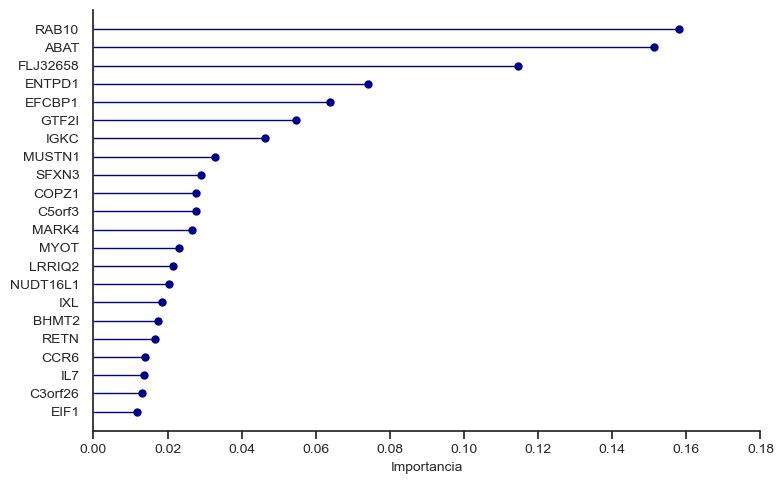

In [105]:
# Ordenarlas variables por importancia
df_plot = xgb_importance_merged.sort_values(by='Importance', ascending=False).head(25)
df_plot = df_plot.dropna(subset=['Gene Symbol'])  # por si acaso
df_plot['Gene Symbol'] = df_plot['Gene Symbol'].astype(str)
df_plot = df_plot.iloc[::-1]


# Gráfica
plt.figure(figsize=(8, 5))
sns.set_style("ticks")
plt.tick_params(axis='y', length=0)

plt.hlines(
    y=df_plot['Gene Symbol'],
    xmin=0,
    xmax=df_plot['Importance'],
    color='darkblue',
    linewidth=1)

plt.plot(
    df_plot['Importance'],
    df_plot['Gene Symbol'],
    'o',
    markersize=5,
    color='darkblue')

plt.xlabel('Importancia', fontsize=10)
plt.xlim(0, 0.18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(axis='y', which='major', pad=10)
sns.despine()

plt.grid(False)
plt.tight_layout()

# Guardar como PNG
plt.savefig("./Figuras/variables_relif_xgb.png", dpi=500)

plt.show()

In [81]:
rf_importance_merged.to_csv('23_list_protein.csv', index=False)

/Users/mariam/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
